In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

(array([0, 1, 2]), array([250, 250, 250], dtype=int64))
(750, 2) (750,)


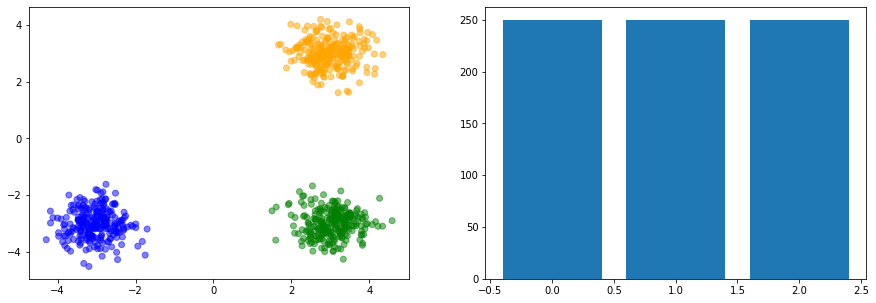

In [2]:
centers_ = [[3, 3], [-3, -3], [3, -3]]
x_data, y_data = make_blobs(n_samples=750, centers=centers_,cluster_std=0.5, n_features=2,random_state=0)

print(np.unique(y_data,return_counts=True))

values,counts = np.unique(y_data,return_counts=True)

color = np.where(y_data==0,'orange',np.where(y_data==1,'blue','green'))

print(x_data.shape,y_data.shape)
#color = np.where()
fig ,(ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
_=ax1.scatter(x_data[:,0],x_data[:,1],c=color, alpha=0.5)
_=ax2.bar(values,counts)


In [3]:
class Dbscan:
    
    def __init__(self, eps, min_num_cls_member, broder_points_neighour_counts=1, noise__points_neighour_counts=1):
        self.eps = eps
        self.min_cls_member = min_num_cls_member
        self.broder_points= broder_points_neighour_counts
        self.noise_points= noise__points_neighour_counts
        #self.distance_matrix = None
        #self.points_type = None
        
    def fit(self, data: np.ndarray) ->np.ndarray:
        num_of_observation,num_feature = data.shape
        cluster_lbl = np.full(num_of_observation,-1)
        neighbours_hood,neighbour_counts = self._find_neighbours(data)
        core_points = neighbour_counts >= self.min_cls_member
        lbl=0
        stack = []
        for idx in range(num_of_observation):
            if core_points[idx] is False:
                continue
            if cluster_lbl[idx] != -1 :
                continue
            while True:
                if cluster_lbl[idx] == -1:
                    cluster_lbl[idx] = lbl
                    if core_points[idx]:
                        neighbours = neighbours_hood[idx] 
                        neighbours_idx = np.argwhere(neighbours==True).flatten()
                        for nei_idx in neighbours_idx:
                            if cluster_lbl[nei_idx] == -1:
                                stack.append(nei_idx)
                            
                if len(stack) == 0:
                    break
                idx = stack.pop()    
            lbl += 1            
        return cluster_lbl,neighbours_hood,neighbour_counts  
    
    def _find_neighbours(self,data: np.ndarray) ->np.ndarray:
        distance_matrix = self._build_distance_matrix(data)
        neighbours_hood =  distance_matrix <= self.eps    
        return neighbours_hood,np.sum(neighbours_hood,axis=1)
            
    
    def _eucleiden_distance(self, a: np.ndarray,b: np.ndarray)->  np.ndarray:
        diff = a - b
        ssd = np.sum(diff**2, axis=1)
        return np.sqrt(ssd)
    
    def _build_distance_matrix(self,data: np.ndarray) ->np.ndarray:
        no_of_obs,no_of_feature = data.shape
        i, j = np.triu_indices(no_of_obs, k=1)      # Upeer Traingular index Without Diagonal index
        a = data[i]                                 # Selecting elements for upper triangular distance computation
        b = data[j]                                 # Selecting elements for upper triangular distance computation 
        upper_triangle_distance =  self._eucleiden_distance(a,b)
        d_mat = np.zeros((no_of_obs, no_of_obs))    # Distance Matrix with all 0
        d_mat[i,j] = upper_triangle_distance        # Filling Up Upper Triangular Matrix
        d_mat = d_mat + d_mat.T                     # Filling Up lower Triangular Matrix
        return d_mat

In [8]:
cls = Dbscan(0.3,min_num_cls_member=3)
cluster_lbl,neighbours_hood,neighbour_counts = cls.fit(x_data)
print(cluster_lbl.shape)

target_values,target_counts = np.unique(cluster_lbl,return_counts=True)
print(target_values,target_counts)

(750,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [245 243 240   1   1   1   1   1   1   1   1   1   1   3   1   1   1   1
   1   1   1   1   1]


(750, 2) (750,)


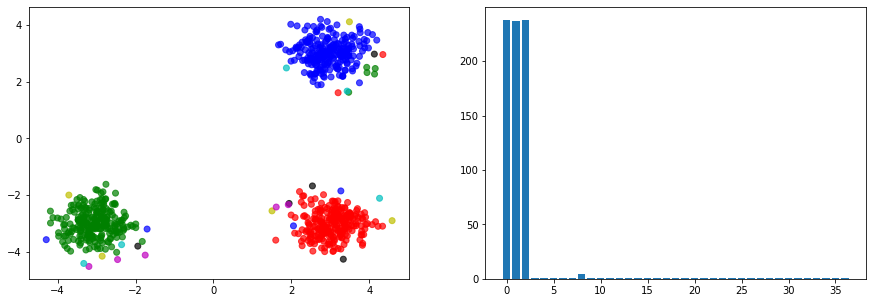

In [5]:
colors = ['b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k']

colors_1 = colors[:target_values.shape[0]]

my_function = lambda x: colors_1[x]

my_function = np.vectorize(my_function)

color1 = my_function(cluster_lbl)

print(x_data.shape,cluster_lbl.shape)
#color = np.where()
fig ,(ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
_=ax1.scatter(x_data[:,0],x_data[:,1],c=color1, alpha=0.7)
_=ax2.bar(target_values,target_counts)


In [6]:
neighbour_counts

array([27, 30, 24, 10,  7,  4, 26, 22,  7, 28, 37, 16, 21, 13,  1, 16,  2,
       16,  2, 16, 24, 25, 26, 18, 28, 20, 28, 11, 16, 22, 33, 33,  3, 33,
       19, 10, 34,  9, 34,  2, 27, 35, 32, 22,  2, 25, 26, 23,  9, 23,  9,
       28,  4, 25, 27, 30, 14,  4, 11, 23, 19, 18, 28,  8, 29, 13, 21,  5,
       12, 35, 31, 29,  9, 34, 29, 28,  2,  8, 12, 22, 23, 14,  3, 11, 14,
        3, 17, 30, 31, 26,  6, 14, 26, 24, 25,  1,  5, 33, 30, 14, 33, 23,
       30, 23, 30,  5, 19, 24,  3, 12,  2, 11, 28,  4,  6,  5, 15, 13,  9,
        7, 26, 15,  6, 10, 26, 28, 31,  8, 34, 12, 21, 19,  9, 11, 29,  2,
       24, 24,  9, 20,  4, 30, 18, 11, 14, 28,  2, 15, 22,  3, 24, 27, 26,
       17,  2, 26,  1, 16,  3,  8, 10,  4, 15, 13, 23,  2, 11,  3, 26, 18,
       18,  4, 14, 34, 16, 23, 22, 16,  3, 12,  6, 12,  6, 12, 15,  6, 26,
       22, 31, 25, 32, 14,  8, 28,  4, 25,  2, 15,  4, 21, 23, 14,  1,  7,
       26,  9, 24, 17, 17, 31, 22, 31,  8, 10,  6,  2,  9, 20,  1, 11, 13,
        8,  5, 18, 27, 10

In [9]:
neighbour_counts[neighbour_counts< 3]

array([2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2])